## Predicting Stock Prices with Python and Machine Learning

In [3]:
# Import the libraries
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
plt.style.use('fivethirtyeight')

In [9]:
data = yf.download('AAPL', start='2020-1-2', end='2026-1-1')  # Download AAPL (Apple Inc) stock data
data

/tmp/ipykernel_12228/3891466513.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start='2020-1-2', end='2026-1-1')  # Download AAPL (Apple Inc) stock data
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.468262,72.528582,71.223259,71.476600,135480400
2020-01-03,71.763725,72.523754,71.539337,71.696167,146322800
2020-01-06,72.335541,72.374146,70.634524,70.885457,118387200
2020-01-07,71.995346,72.600952,71.775781,72.345197,108872000
2020-01-08,73.153511,73.455110,71.698596,71.698596,132079200
...,...,...,...,...,...
2025-12-24,273.809998,275.429993,272.200012,272.339996,17910600
2025-12-26,273.399994,275.369995,272.859985,274.160004,21521800


In [14]:
data = data.reset_index()
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2020-01-02,72.468262,72.528582,71.223259,71.476600,135480400
1,2020-01-03,71.763725,72.523754,71.539337,71.696167,146322800
2,2020-01-06,72.335541,72.374146,70.634524,70.885457,118387200
3,2020-01-07,71.995346,72.600952,71.775781,72.345197,108872000
4,2020-01-08,73.153511,73.455110,71.698596,71.698596,132079200
...,...,...,...,...,...,...
1503,2025-12-24,273.809998,275.429993,272.200012,272.339996,17910600
1504,2025-12-26,273.399994,275.369995,272.859985,274.160004,21521800
1505,2025-12-29,273.760010,274.359985,272.350006,272.690002,23715200


In [16]:
data = data.droplevel(level=1, axis=1)
data

Price,Date,Close,High,Low,Open,Volume
0,2020-01-02,72.468262,72.528582,71.223259,71.476600,135480400
1,2020-01-03,71.763725,72.523754,71.539337,71.696167,146322800
2,2020-01-06,72.335541,72.374146,70.634524,70.885457,118387200
3,2020-01-07,71.995346,72.600952,71.775781,72.345197,108872000
4,2020-01-08,73.153511,73.455110,71.698596,71.698596,132079200
...,...,...,...,...,...,...
1503,2025-12-24,273.809998,275.429993,272.200012,272.339996,17910600
1504,2025-12-26,273.399994,275.369995,272.859985,274.160004,21521800
1505,2025-12-29,273.760010,274.359985,272.350006,272.690002,23715200
1506,2025-12-30,273.079987,274.079987,272.279999,272.809998,22139600


In [18]:
df = data.copy()

In [24]:
df.columns.name = ''

In [25]:
df

,Date,Close,High,Low,Open,Volume
0,2020-01-02,72.468262,72.528582,71.223259,71.476600,135480400
1,2020-01-03,71.763725,72.523754,71.539337,71.696167,146322800
2,2020-01-06,72.335541,72.374146,70.634524,70.885457,118387200
3,2020-01-07,71.995346,72.600952,71.775781,72.345197,108872000
4,2020-01-08,73.153511,73.455110,71.698596,71.698596,132079200
...,...,...,...,...,...,...
1503,2025-12-24,273.809998,275.429993,272.200012,272.339996,17910600
1504,2025-12-26,273.399994,275.369995,272.859985,274.160004,21521800
1505,2025-12-29,273.760010,274.359985,272.350006,272.690002,23715200
1506,2025-12-30,273.079987,274.079987,272.279999,272.809998,22139600


In [26]:
df['Date']

0      2020-01-02
1      2020-01-03
2      2020-01-06
3      2020-01-07
4      2020-01-08
          ...    
1503   2025-12-24
1504   2025-12-26
1505   2025-12-29
1506   2025-12-30
1507   2025-12-31
Name: Date, Length: 1508, dtype: datetime64[ns]

In [27]:
df.set_index(df['Date'], inplace=True)

In [29]:
df = df.drop('Date', axis=1)
df

,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,72.468262,72.528582,71.223259,71.476600,135480400
2020-01-03,71.763725,72.523754,71.539337,71.696167,146322800
2020-01-06,72.335541,72.374146,70.634524,70.885457,118387200
2020-01-07,71.995346,72.600952,71.775781,72.345197,108872000
2020-01-08,73.153511,73.455110,71.698596,71.698596,132079200
...,...,...,...,...,...
2025-12-24,273.809998,275.429993,272.200012,272.339996,17910600
2025-12-26,273.399994,275.369995,272.859985,274.160004,21521800
2025-12-29,273.760010,274.359985,272.350006,272.690002,23715200


In [30]:
def prepare_data(df, forecast_days = 30):
    df = df[['Close']].copy()
    df['Prediction'] = df[['Close']].shift(-forecast_days)
    X = np.array(df.drop('Prediction', axis=1))[:-forecast_days]
    y = np.array(df['Prediction'])[:-forecast_days]
    return X, y, df

In [32]:
def train_and_predict(X, y, df, forecast_days = 30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print("Model Evaluation:")
    print(f"MSE: {mse:.2f}")
    print(f"R2: {r2:.4f}")

    X_future = np.array(df.drop(['Prediction'], axis=1))[-forecast_days:]

    future_predictions = model.predict(X_future)
    
    return future_predictions, model

In [33]:
def plot_predictions(df, future_days, future_predictions):
    df_future = df.copy()

    last_date = df.index[-1]
    future_dates = pd.date_range(last_date + pd.Timedelta(days=1), periods=future_days)
    
    plt.figure(figsize=(12, 6))
    plt.plot(df['Close'], label='Historical Close Price')
    plt.plot(future_dates, future_predictions, label='Predicted Future Price', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Stock Price Predictions')
    plt.legend()
    plt.show()

In [50]:
forecast_days = 300
X, y, df = prepare_data(df, forecast_days)

In [51]:
X

array([[ 72.46826172],
       [ 71.76372528],
       [ 72.33554077],
       ...,
       [230.48284912],
       [230.8507843 ],
       [233.68484497]], shape=(1208, 1))

In [52]:
y

array([117.99300385, 120.87872314, 122.41905212, ..., 273.76000977,
       273.07998657, 271.85998535], shape=(1208,))

In [53]:
df

,Close,Prediction
Date,,
2020-01-02,72.468262,117.993004
2020-01-03,71.763725,120.878723
2020-01-06,72.335541,122.419052
2020-01-07,71.995346,121.629395
2020-01-08,73.153511,117.505539
...,...,...
2025-12-24,273.809998,NaN
2025-12-26,273.399994,NaN
2025-12-29,273.760010,NaN


In [54]:
future_predictions, model = train_and_predict(X, y, df, forecast_days)

Model Evaluation:
MSE: 475.23
R2: 0.6936


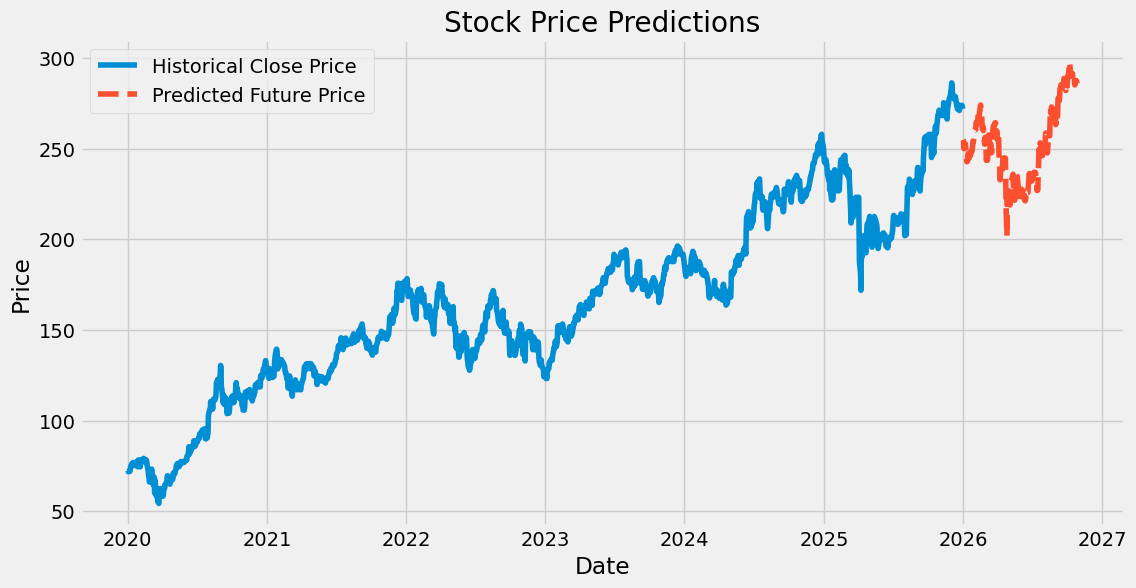

Future Price Predictions
[254.83863477 254.31863629 250.0410139  249.88164105 250.58619955
 252.25530937 252.48177506 249.48743682 245.97310009 243.45685465
 242.7019733  243.90977317 243.2974818  247.28992421 247.06321399
 244.77091167 244.77091167 245.51821242 248.12120363 245.41745089
 247.95325917 248.17157796 248.77613428 248.37308815 249.5066393
 252.02565184 253.8645337  253.75538074 255.77058563 257.66823325
 260.237633   260.53991759 260.56509189 260.39716029 263.68026932
 264.53674877 263.4619634  264.69628894 264.8390205  267.28244581
 269.33125503 264.77185043 266.23287333 270.17934305 270.83428657
 273.29452049 273.98300399 271.10295396 268.25648253 266.76186816
 261.24524831 260.83381076 262.21085499 259.86819121 260.27960303
 255.36755237 253.31036459 252.36991934 256.22399322 248.15478223
 249.5990094  243.43582459 244.43503561 244.29231692 243.55338186
 249.49824786 256.55147785 257.47512736 255.98889156 254.65383022
 247.94486773 251.96688608 251.68980152 252.319545  

In [55]:
plot_predictions(df, future_days=forecast_days, future_predictions=future_predictions)
print("Future Price Predictions")
print(future_predictions)